In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import category_encoders as ce
import xgboost as xgb
import warnings

from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform
from xgboost import XGBRegressor


In [2]:
path='C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/'

In [3]:
df=pd.read_csv(path+'idealista_rent_06.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  4800 non-null   int64  
 1   propertyCode           4800 non-null   int64  
 2   thumbnail              4777 non-null   object 
 3   numPhotos              4800 non-null   int64  
 4   floor                  4254 non-null   object 
 5   price                  4800 non-null   float64
 6   priceInfo              4800 non-null   object 
 7   propertyType           4800 non-null   object 
 8   operation              4800 non-null   object 
 9   size                   4800 non-null   float64
 10  rooms                  4800 non-null   int64  
 11  bathrooms              4800 non-null   int64  
 12  address                4800 non-null   object 
 13  province               4800 non-null   object 
 14  municipality           4800 non-null   object 
 15  dist

In [12]:
df.columns

Index(['index', 'propertyCode', 'thumbnail', 'numPhotos', 'floor', 'price',
       'priceInfo', 'propertyType', 'operation', 'size', 'rooms', 'bathrooms',
       'address', 'province', 'municipality', 'district', 'country',
       'neighborhood', 'latitude', 'longitude', 'showAddress', 'url',
       'distance', 'description', 'hasVideo', 'newDevelopment', 'tenantNumber',
       'tenantGender', 'hasLift', 'isSmokingAllowed', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'isOnlineBookingActive', 'topNewDevelopment', 'topPlus',
       'externalReference', 'highlight'],
      dtype='object')

In [4]:
df.describe()

,index,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,tenantNumber,priceByArea
count,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.00000,4800.000000,4800.000000
mean,2399.500000,9.692784e+07,16.267708,553.815000,147.433958,5.328958,2.488750,40.416566,-3.699703,3905.44875,5.316458,5.212292
std,1385.784976,1.923822e+07,11.321156,173.578839,187.682144,5.026655,4.771141,0.035427,0.034572,2985.56771,5.124707,4.658290
min,0.000000,2.421142e+06,0.000000,220.000000,8.000000,1.000000,0.000000,40.302087,-3.845054,46.00000,2.000000,0.000000
25%,1199.750000,9.933345e+07,9.000000,425.000000,85.000000,3.000000,1.000000,40.399406,-3.715196,1798.00000,3.000000,3.000000
50%,2399.500000,1.037581e+08,14.000000,530.000000,115.000000,4.000000,2.000000,40.420938,-3.703134,3023.00000,4.000000,5.000000
75%,3599.250000,1.051858e+08,20.000000,650.000000,160.000000,6.000000,2.000000,40.436268,-3.683756,5383.00000,6.000000,6.000000
max,4799.000000,1.053511e+08,99.000000,2500.000000,3000.000000,74.000000,74.000000,40.510457,-3.553821,12975.00000,74.000000,100.000000


In [20]:
df[['price','size','priceByArea']]

,price,size,priceByArea
0,250.0,90.0,3.0
1,395.0,120.0,3.0
2,400.0,110.0,4.0
3,495.0,555.0,1.0
4,390.0,200.0,2.0
...,...,...,...
4795,590.0,120.0,5.0
4796,320.0,89.0,4.0
4797,400.0,60.0,7.0
4798,395.0,80.0,5.0


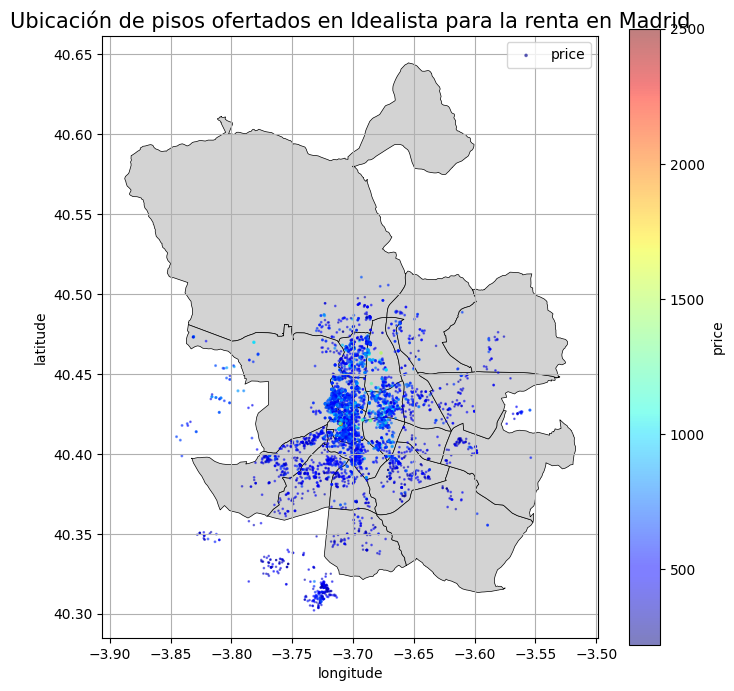

In [11]:
import pandas as pd
import geopandas as gpd

path="C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/"
madrid_districts = gpd.read_file(path+"madrid_districts.geojson")
fig, ax = plt.subplots(figsize=(8, 8))


madrid_districts.plot(ax=ax, color='lightgray', edgecolor='black', alpha=1, linewidth=0.5)



df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=df["price"] / 500, label="price",
            c="price", cmap="jet", colorbar=True,
            legend=True, sharex=False, ax=ax,alpha=0.5)
ax.set_title("Ubicación de pisos ofertados en Idealista para la renta en Madrid", fontsize=15)
ax.legend()


plt.show()